In [1]:
from fastai.tabular import *

import pandas as pd
import numpy as np

import glob

In [ ]:
df = pd.concat([pd.read_csv(f, encoding='latin1') for f in glob.glob('../data/v3/*.csv')])

In [2]:
df.shape

NameError: name 'df' is not defined

In [4]:
df.head()

,origin_day,origin_hour,origin_day_sin,origin_day_cos,origin_hour_sin,origin_hour_cos,origin_density_cluster,origin_speed_cluster,origin_distance_from_density_center,origin_bearing_from_density_center,...,origin_distance_from_speed_center_squared,dest_distance_from_density_center_squared,dest_distance_from_speed_center_squared,distance_origin_dest_squared,distance_origin_dest_density_cluster_squared,distance_origin_dest_speed_cluster_squared,day_hour_crossing,origin_dest_density_cluster_crossing,origin_dest_speed_cluster_crossing,duration
0,1,3,0.4339,0.9010,0.3827,0.9239,7,4,1.4468,148.5357,...,0.8868,2.1252,0.2426,242.2319,173.7757,229.8559,27,148,88,780
1,4,1,0.9749,-0.2225,0.1305,0.9914,3,15,2.0544,110.3500,...,3.5521,1.0870,3.5521,208.4703,170.0207,215.9548,97,62,306,967
2,2,0,0.7818,0.6235,0.0000,1.0000,18,7,1.8751,-98.2730,...,5.3084,5.1456,1.6656,61.6995,82.8901,28.1536,48,360,145,360
3,6,6,0.4339,-0.9010,0.7071,0.7071,3,19,1.0985,-86.8403,...,3.7473,2.6791,5.1611,27.4586,23.1217,25.9631,150,77,392,300
4,5,4,0.7818,-0.6235,0.5000,0.8660,15,2,2.5745,115.7678,...,7.4049,4.6955,9.8552,139.8543,54.3788,36.9093,124,311,46,1017


In [5]:
df.duration = df.duration.astype('float32')

In [6]:
cont_names = [
    'origin_day_sin', 'origin_day_cos', 'origin_hour_sin', 'origin_hour_cos',
    'origin_distance_from_density_center', 'origin_bearing_from_density_center',
    'origin_distance_from_speed_center', 'origin_bearing_from_speed_center',
    'dest_distance_from_density_center', 'dest_bearing_from_density_center',
    'dest_distance_from_speed_center', 'dest_bearing_from_speed_center',
    'distance_origin_dest', 'bearing_origin_dest',
    'distance_origin_dest_density_cluster', 'distance_origin_dest_speed_cluster',
    'origin_distance_from_density_center_squared', 'origin_distance_from_speed_center_squared',
    'dest_distance_from_density_center_squared', 'dest_distance_from_speed_center_squared',
    'distance_origin_dest_squared', 
    'distance_origin_dest_density_cluster_squared', 'distance_origin_dest_speed_cluster_squared',
]
cat_names = [
    "origin_day", "origin_hour",
    "origin_density_cluster", "origin_speed_cluster",
    "dest_density_cluster", "dest_speed_cluster",
    "day_hour_crossing", "origin_dest_density_cluster_crossing", "origin_dest_speed_cluster_crossing"
]
dep_var = 'duration'

In [7]:
procs = [Categorify, Normalize]

In [8]:
np.random.seed(2020)
valids = np.random.random(4030555)

In [9]:
valid_idx = df[valids > 0.9999].index

In [10]:
data = TabularDataBunch.from_df(
    '../models', df, dep_var, valid_idx=valid_idx, procs=procs, 
    cat_names=cat_names, cont_names=cont_names
)

In [11]:
learn = tabular_learner(
    data, layers=[128, 32], metrics=root_mean_squared_error
)

In [12]:
learn.lr_find()

epoch,train_loss,valid_loss,root_mean_squared_error,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


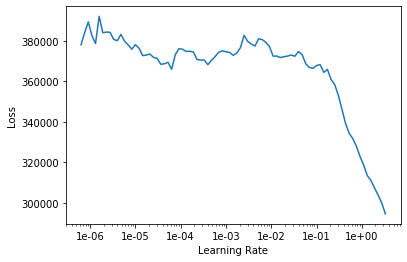

In [13]:
learn.recorder.plot()

In [14]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(8, 5)
    (1): Embedding(25, 10)
    (2): Embedding(21, 9)
    (3): Embedding(21, 9)
    (4): Embedding(21, 9)
    (5): Embedding(21, 9)
    (6): Embedding(169, 28)
    (7): Embedding(401, 46)
    (8): Embedding(397, 46)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(23, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=194, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=128, out_features=32, bias=True)
    (4): ReLU(inplace=True)
    (5): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [15]:
learn.fit_one_cycle(1, 0.2)

epoch,train_loss,valid_loss,root_mean_squared_error,time


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/jjkoh/anaconda3/envs/ml-3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-41a010479f3a>", line 1, in <module>
    learn.fit_one_cycle(1, 0.2)
  File "/home/jjkoh/anaconda3/envs/ml-3.7/lib/python3.7/site-packages/fastai/train.py", line 23, in fit_one_cycle
    learn.fit(cyc_len, max_lr, wd=wd, callbacks=callbacks)
  File "/home/jjkoh/anaconda3/envs/ml-3.7/lib/python3.7/site-packages/fastai/basic_train.py", line 200, in fit
    fit(epochs, self, metrics=self.metrics, callbacks=self.callbacks+callbacks)
  File "/home/jjkoh/anaconda3/envs/ml-3.7/lib/python3.7/site-packages/fastai/basic_train.py", line 101, in fit
    loss = loss_batch(learn.model, xb, yb, learn.loss_func, learn.opt, cb_handler)
  File "/home/jjkoh/anaconda3/envs/ml-3.7/lib/python3.7/site-packages/fastai/basic_train.py", line 26, in loss_batch
    out = mode

KeyboardInterrupt: 

In [ ]:
learn.fit_one_cycle(1, 0.5)

In [ ]:
learn.fit_one_cycle(2, 0.1)

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.export('fastai-999.pkl')

In [ ]:
learn = load_learner('../models/', 'fastai-999.pkl')